Core Operations in OpenCV
===

In which we learn the basic operations and arithmetic operations on images.

## Basic Operations

### Access and Modify Pixel Values

In [1]:
import cv2
import numpy as np

image = cv2.imread('figures/darth.JPG')

We can access a pixel value by its row and column coordinates. For RGB image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [2]:
pixel = image[100, 100]
print(pixel)

[27 30 35]


Access only red pixel.

In [3]:
red = image[100, 100, 2]
print(red)

35


We can modify the pixel values the same way.

In [4]:
image[100, 100] = [255, 255, 255]
print(image[100, 100])

[255 255 255]


In [5]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# alternative pixel access
# access red value
print(image.item(10, 10, 2))

30


In [8]:
# alternative pixel modification
# modify red value
image.itemset((10, 10, 2), 100)
print(image.item(10, 10, 2))

100


### Accessing Image Properties

The shape of an image may be accessed as if accessing an array, `image.shape`. It returns a tuple of number of rows, columns, and channels (if the image is not grayscale).

In [9]:
print(image.shape)

(804, 1920, 3)


If the image is grayscale, it will only return `ROWxCOL`. Thus, it may be used for checking if an image is grayscale or colored.

To get the total number of pixels.

In [10]:
print(image.size)

4631040


To get the image data type.

In [11]:
print(image.dtype)

uint8


## Region of Interest

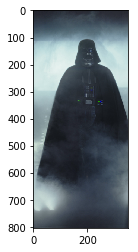

In [12]:
darth = image[0:900, 550:550+350]
plt.imshow(darth)
plt.show()

(804, 350, 3)


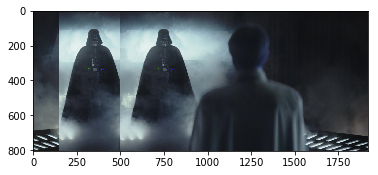

In [13]:
print(darth.shape)
image[0:900, 150:500] = darth
plt.imshow(image)
plt.show()

## Splitting and Merging Image Channels

The RGB channels can be split into their individual planes when needed. It can also be merged to form RGB again.

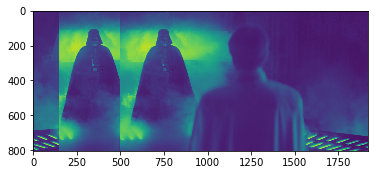

In [14]:
b,g,r = cv2.split(image)

plt.imshow(b)
plt.show()

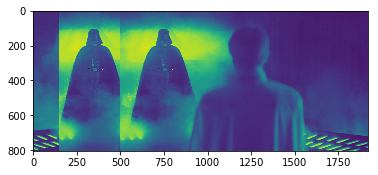

In [15]:
plt.imshow(r)
plt.show()

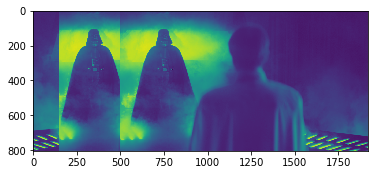

In [16]:
plt.imshow(g)
plt.show()

In [17]:
print(image)

[[[25 26 30]
  [24 25 29]
  [24 25 29]
  ...
  [17 18 16]
  [20 18 18]
  [19 16 18]]

 [[24 25 29]
  [24 25 29]
  [24 25 29]
  ...
  [17 16 18]
  [18 17 19]
  [19 16 18]]

 [[25 26 30]
  [24 25 29]
  [24 25 29]
  ...
  [17 16 18]
  [18 17 19]
  [17 16 18]]

 ...

 [[29 34 33]
  [29 34 33]
  [29 34 33]
  ...
  [40 50 57]
  [43 51 58]
  [42 50 57]]

 [[30 35 34]
  [29 34 33]
  [30 35 34]
  ...
  [52 63 71]
  [52 63 71]
  [50 61 69]]

 [[28 34 33]
  [28 33 32]
  [29 34 33]
  ...
  [58 71 79]
  [59 70 78]
  [55 67 73]]]


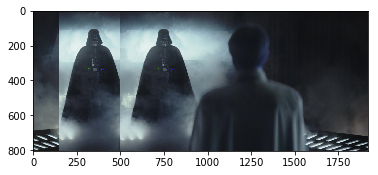

In [18]:
image = cv2.merge((b, g, r))

plt.imshow(image)
plt.show()

Since using `cv2.merge()` is computationally intensive, we can use NumPy slicing instead.

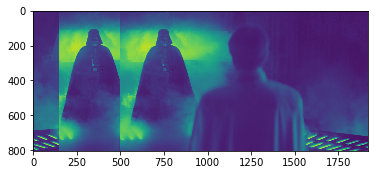

In [19]:
b = image[:, :, 0]

plt.imshow(b)
plt.show()

We can also use NumPy slicing as a way to access an image channel.

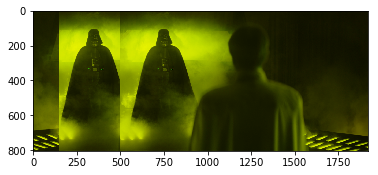

In [20]:
image[:, :, 2] = 0

plt.imshow(image)
plt.show()

## Image Padding

In which we learn to create a border around an image. To do so, we shall use `cv2.copyMakeBorder()`. This function takes the following arguments

1. The input image `src`
2. Border width in number of pixels `top, bottom, left, right`
3. The kind of border to be added `borderType`

  a. `cv2.BORDER_CONSTANT` - a constant colored border, the value of which should be given as the next argument.
  
  b. `cv2.BORDER_REFLECT` - a border will be mirror reflection of the border elements, like this: `fedcba|abcdefgh|hgfedcba`
  
  c. `cv2.BORDER_REFLECT_101` or `cv2.BORDER_DEFAULT` - a border that is same as above, but with a slight change: `gfedcb|abcdefgh|gfedcba`
  
  d. `cv2.BORDER_REPLICATE` - a border whose last element will be replicated throughout: `aaaaaa|abcdefgh|hhhhhhh`
  
  e. `cv2.BORDER_WRAP` - a border that will look like this: `cdefgh|abcdefgh|abcdefg`

4. The color of the border if border type is `cv2.BORDER_CONSTANT`: `value` 

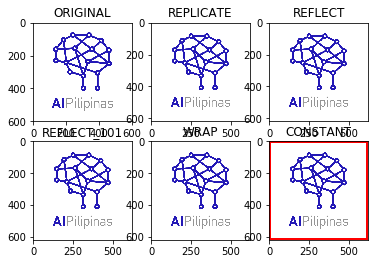

In [21]:
image= cv2.imread('figures/aipilipinas.png')

BLUE = [255, 0, 0]

replicate = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)

plt.subplot(231), plt.imshow(image, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

## Arithmetic Operations

### Image Addition

We can add images by using `cv2.add()`. But both images must have the same size.

In [22]:
opencv = cv2.imread('figures/opencv.png')
python = cv2.imread('figures/python.png')

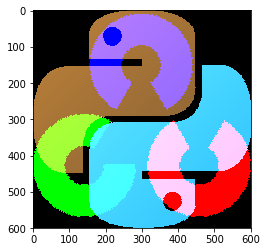

In [23]:
plt.imshow(cv2.add(opencv, python))
plt.show()

## Image Blending

This is also image addition, but there are different weights given to images. The equation is as follows

$$ g(x) = (1 - \alpha)\ f_{0}(x) + \alpha\ f_{1}(x) $$ 

By varying $\alpha$ from 0 $\rightarrow$ 1, it will give a "transition feel" between the images.

For our example, we take two images to blend together. We assign a weight of 0.7 to the first image, and 0.3 to the second. Using `cv2.addWeighted()` applies the following equation

$$ dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma $$ 

In [24]:
dst = cv2.addWeighted(opencv, 0.7, python, 0.3, 0)

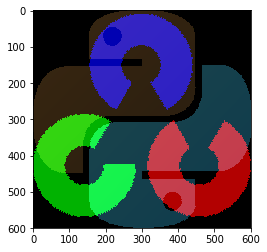

In [25]:
plt.imshow(dst)
plt.show()

### Bitwise Operation

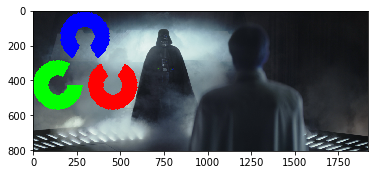

In [26]:
darth = cv2.imread('figures/darth.JPG')

rows, cols, channels = opencv.shape

# let's put the logo at the top-left corner
roi = darth[0:rows, 0:cols]

# create a mask of the logo
opencv_gray = cv2.cvtColor(opencv, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(opencv_gray, 10, 255, cv2.THRESH_BINARY)
# create its inverse mask
mask_inv = cv2.bitwise_not(mask)

# black out the area of logo in ROI
darth_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# take region of logo from logo image
opencv_fg = cv2.bitwise_and(opencv, opencv, mask=mask)

# put logo on region of interest
dst = cv2.add(darth_bg, opencv_fg)
darth[0:rows, 0:cols] = dst

plt.imshow(darth)
plt.show()